In [1]:
import analyze_results_code
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
import pickle

# GLOBAL ANALYSIS

## Load ranked contingencies

In [2]:
df_contg = analyze_results_code.load_df("/home/user/Projects/output/")

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.


## Show DynaFlow simulation failures
Show all contingencies where DynaFlow has failed for the set of simulations provided.

In [3]:
df_contg[df_contg["STATUS"] == "HDS"].sort_values("N_ITER", ascending=False)

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
.HERNL71ARGIA,1450.844636,425.861661,991.987062,82,10,2129.434146,0,43.333333,132.063492,3,71,79,14474.643991757124,HDS,100000.0,2023-02-26 18:00:00
.HERNL71ARGIA,681.748360,822.340206,844.112194,63,10,1626.589872,0,15.000000,13.333333,0,58,97,7556.247813591889,HDS,100000.0,2023-02-01 17:00:00
.HERNL71ARGIA,545.915259,295.018297,712.404707,62,10,888.371992,0,42.500000,0.000000,0,70,84,10719.275900383775,HDS,100000.0,2023-02-26 17:00:00
.HERNL71ARGIA,511.994136,628.560737,882.476753,61,10,477.594887,0,10.000000,0.000000,0,71,77,6698.175255867975,HDS,100000.0,2023-02-15 18:00:00
.HERNL71ARGIA,569.230258,560.694503,991.817392,59,10,533.039030,0,5.000000,0.000000,0,79,102,9340.647793459251,HDS,100000.0,2023-02-19 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVELIL71MASTA,0.000000,0.000000,15.021094,8,20,11.020857,0,0.000000,0.000000,0,3,0,4106.158622560741,HDS,100000.0,2023-01-07 14:00:00
ARGOEL71MANDA,2.111542,0.000000,5.508305,8,31,13.015714,0,0.000000,0.000000,0,12,0,4281.5335527016805,HDS,100000.0,2023-01-06 11:00:00
ARGOEL73TERRI,0.000000,0.000000,0.000000,8,29,14.016084,0,0.000000,0.000000,0,7,0,4230.774396034277,HDS,100000.0,2023-01-06 11:00:00


In [4]:
df_contg[df_contg["STATUS"] == "HDS"].index.value_counts()

MANDAL71PEUP5    1436
BVIL7L71GAUGL     156
BLAYAL72BRAUD     149
BUGEYL72SSV.O     143
COULAL73CRUA5     141
                 ... 
P.ANDL73DEPHG      20
P.ANDL71ZP.AN      20
CHAN5L71DISTR      20
BROMML77RUEYR      18
P.ANDL72ZP.AN      16
Name: NAME, Length: 438, dtype: int64

## Show Hades non-convergence
Show all contingencies where Hades has failed for the set of simulations provided.

In [5]:
df_contg[df_contg["STATUS"] == "DWO"]

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
P.ANDL72ZP.AN,0.0,0.0,0.0,14,16,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-25 08:00:00
.VENAL71VLARO,0.0,0.0,0.0,15,9,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-25 08:00:00
VLAROL71ZP.AN,0.0,0.0,0.0,15,16,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-25 08:00:00
.VENAL71VLARO,0.0,0.0,0.0,16,9,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-26 23:00:00
P.ANDL72ZP.AN,0.0,0.0,0.0,15,16,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-26 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
.VENAL71VLARO,0.0,0.0,0.0,15,9,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-17 23:00:00
VLAROL71ZP.AN,0.0,0.0,0.0,16,16,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-17 23:00:00
P.ANDL72ZP.AN,0.0,0.0,0.0,13,16,0.0,0,0.0,0.0,0,0,0,Divergence,DWO,100000.0,2023-06-19 12:00:00


In [6]:
df_contg[df_contg["STATUS"] == "DWO"].index.value_counts()

.VENAL71VLARO    259
P.ANDL72ZP.AN    258
VLAROL71ZP.AN    257
BARNAL71ROUGE     16
FLAMAL72MENUE     16
HAVR5L72ROUGE     15
BARNAL72ROUGE     14
DISTRL72JUMEA     12
GRANZL72JUMEA     11
ROUGEL71TOURB     10
ROUGEL72TOURB     10
.VICHL71BAIXA      8
AVOI5L74CHINX      8
CHAN5L72QUINT      7
AVOI5L73CHINX      6
CIVAUL71VALDI      6
AVOI5L72G.AVO      6
GAUGLL72SSELO      5
VERGEL71VLERB      5
CHAN5L71VLERB      5
CHIN2L72G.AVO      4
MEZE5L71TILL5      3
DISTRL71GALOR      3
MEZE5L72TILL5      3
ROUGEL71TILL5      3
BARNAL71VAUPA      3
ROUGEL72TILL5      3
PICOCL71VLERB      2
COR.PL72DISTR      2
VERGEL72VLERB      2
DONZAL72GOLF5      2
SSEA2L71VERGE      2
TAMARL71TAVEL      1
BARNAL74PALUE      1
ROM  L71VALDI      1
COR.PL71GALOR      1
OUDONL71QUINT      1
TAMARL72TAVEL      1
.HERNL71ARGIA      1
BLAYAL72BRAUD      1
BLAYAL74BRAUD      1
MOLIEL71QUINT      1
GAUDIL71ISSEL      1
GRANZL71ROM        1
GRANZL72VALDI      1
DISTRL71PICOC      1
EGUZOL71MARMA      1
BLAYAL73BRAUD

## Worst contingencies (For cases where both converged)

In [7]:
df_contg = df_contg.sort_values(by="REAL_SCORE", ascending=False)
df_contg[df_contg["STATUS"] == "BOTH"]

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
REALTL71TAVEL,56.700213,59.477176,96.581355,15,24,17.160861,0,0.0,0.0,0,7,0,4487.762264181242,BOTH,47480.0,2023-01-04 21:00:00
REALTL71TAVEL,42.974933,27.053329,78.516258,16,24,108.907356,0,0.0,0.0,0,7,0,4768.273973026564,BOTH,43920.0,2023-01-04 19:00:00
P.ORGL71TAVEL,54.675178,0.000000,291.265932,15,20,20.590408,0,0.0,0.0,0,11,2,4675.24427840894,BOTH,42210.0,2023-01-04 21:00:00
REALTL72TAVEL,199.882525,0.000000,531.126287,17,24,115.446038,0,0.0,0.0,0,7,0,4497.826731804383,BOTH,42180.0,2023-01-04 20:00:00
REALTL72TAVEL,214.653592,0.000000,493.892785,15,24,18.161592,0,0.0,0.0,0,7,0,4417.809413528699,BOTH,42180.0,2023-01-04 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
.EICHL71MUHLB,66.235013,15.033242,106.048111,14,19,4.002573,0,0.0,0.0,0,20,0,3832.959440415822,BOTH,1980.0,2023-01-19 00:00:00
ARGOEL71LIMEU,0.000000,2.038117,30.671440,13,17,4.013383,0,0.0,0.0,0,12,0,3691.7332523120754,BOTH,1920.0,2023-01-19 00:00:00
.ENSDL72VIGY,25.359664,29.540067,16.875766,13,20,4.002573,0,0.0,0.0,0,11,0,3821.283024272806,BOTH,1920.0,2023-01-19 00:00:00


## MAE (Real score vs Predicted score)

In [8]:
df_filtered = df_contg[df_contg["STATUS"] == "BOTH"]

mae = mean_absolute_error(df_filtered["REAL_SCORE"], df_filtered["PREDICTED_SCORE"])
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1418.0309981583632


## All-time top N most different contingencies (using the Real score, median-based statistic)

In [9]:
analyze_results_code.all_time_top(df_filtered)

1 : DONZAL72GOLF5 - 7090.0
2 : CIVAUL71VALDI - 6820.0
3 : FLAMAL72MENUE - 6600.0
4 : P.CORL72SSAL7 - 6340.0
5 : BLAYAL72BRAUD - 6330.0
6 : BVIL7L71GAUGL - 6150.0
7 : BLAYAL73BRAUD - 6030.0
8 : BLAYAL74BRAUD - 6020.0
9 : BOCTOL71N.SE1 - 6010.0
10 : CATG4L74VIGY - 5950.0


## Week day top N most different contingencies (using the Real score, median-based statistic)

In [10]:
analyze_results_code.week_day_top(df_filtered)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

   DONZAL72GOLF5
   CIVAUL71VALDI
   P.CORL72SSAL7
-  BLAYAL74BRAUD
   FLAMAL72MENUE
 + P.CORL71SSAL7
   BVIL7L71GAUGL
-  CATG4L74VIGY
-  BOCTOL71N.SE1
   BLAYAL72BRAUD
   .HERNL71ARGIA
-+ BUGEYL73SSV.O
-  BARNAL74PALUE
 + COULAL73CRUA5

1

   DONZAL72GOLF5
   CIVAUL71VALDI
   FLAMAL72MENUE
   BLAYAL72BRAUD
   P.CORL71SSAL7
   P.CORL72SSAL7
 + BLAYAL73BRAUD
-+ CHIN2L72G.AVO
-  .HERNL71ARGIA
   BVIL7L71GAUGL
   COULAL73CRUA5
-+ AVOI5L72G.AVO
-+ COULAL74CRUA5
 + COULAL72CRUA5

2

   CIVAUL71VALDI
   DONZAL72GOLF5
   FLAMAL72MENUE
   P.CORL72SSAL7
   BLAYAL72BRAUD
   BVIL7L71GAUGL
-  BLAYAL73BRAUD
-  COULAL72CRUA5
 + BARNAL72PALUE
   P.CORL71SSAL7
 + BARNAL74PALUE
 + BLAYAL74BRAUD
-  COULAL73CRUA5
-+ SSEA2L71VERGE

3

   CIVAUL71VALDI
   FLAMAL72MENUE
   DONZAL72GOLF5
   BLAYAL72BRAUD
 + BOCTOL71N.SE1
   P.CORL72SSAL7
   BVIL7L71GAUGL
-  BLAYAL74BRAUD
   BARNAL74PALUE
   BARNAL72PALUE
-+ TAMARL72TAVEL
   P.CORL71SSAL7
-+ TAMARL71TAVEL
-+ CHIN2L72G.AVO

4

   DONZAL72GOLF5
   CIVAUL71V

## Month top N most different contingencies (using the Real score, median-based statistic)

In [11]:
analyze_results_code.month_top(df_filtered)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

 + DONZAL72GOLF5
   FLAMAL72MENUE
   BLAYAL72BRAUD
-  BLAYAL74BRAUD
   BVIL7L71GAUGL
 + P.CORL71SSAL7
   P.CORL72SSAL7
-+ .HERNL71ARGIA
-+ BOCTOL72N.SE2
 + CATG4L74VIGY
-  BARNAL74PALUE
 + BVILXL72GAUGL
-+ BARNAL73PALUE
-+ CATG2L72VIGY

1

-  DONZAL72GOLF5
 + CIVAUL71VALDI
   FLAMAL72MENUE
   P.CORL72SSAL7
 + BLAYAL73BRAUD
   BLAYAL72BRAUD
-+ COULAL71CRUA5
   BVIL7L71GAUGL
-  BVILXL72GAUGL
-+ COULAL72CRUA5
-  P.CORL71SSAL7
-+ COULAL73CRUA5
-  CATG4L74VIGY
-+ COULAL74CRUA5

2

-+ CIVAUL72VALDI
   FLAMAL72MENUE
   P.CORL72SSAL7
-  CIVAUL71VALDI
 + BLAYAL74BRAUD
-+ BOCTOL71N.SE1
   BVIL7L71GAUGL
-+ CHOO1L71LONNY
-  BLAYAL73BRAUD
-+ BARNAL71PALUE
   BLAYAL72BRAUD
-+ SSEA2L71VERGE
 + BARNAL74PALUE
-+ CHIN2L72G.AVO


## Hour top N most different contingencies (using the Real score, median-based statistic)

In [12]:
analyze_results_code.hour_top(df_filtered)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

   DONZAL72GOLF5
   CIVAUL71VALDI
   P.CORL72SSAL7
   BLAYAL72BRAUD
   FLAMAL72MENUE
   BOCTOL71N.SE1
   CATG4L74VIGY
   BVIL7L71GAUGL
-  TAMARL72TAVEL
-  TAMARL71TAVEL
-+ BLAYAL74BRAUD
-+ BUGEYL74SSV.O
   COULAL72CRUA5
-  COULAL73CRUA5

1

   CIVAUL71VALDI
   DONZAL72GOLF5
   P.CORL72SSAL7
-  BLAYAL72BRAUD
   BVIL7L71GAUGL
   FLAMAL72MENUE
 + BARNAL74PALUE
-+ BLAYAL73BRAUD
-+ .HERNL71ARGIA
   BOCTOL71N.SE1
-+ P.CORL71SSAL7
-  COULAL72CRUA5
 + BARNAL71PALUE
-  CATG4L74VIGY

2

   CIVAUL71VALDI
   BOCTOL71N.SE1
   P.CORL72SSAL7
   DONZAL72GOLF5
   BVIL7L71GAUGL
   FLAMAL72MENUE
   BARNAL71PALUE
-+ CHIN2L72G.AVO
-+ D.BUXL73TABAR
-+ BUGEYL72SSV.O
   BARNAL74PALUE
-+ BUGEYL73SSV.O
-+ TAMARL71TAVEL
-+ BUGEYL74SSV.O

3

   DONZAL72GOLF5
   CIVAUL71VALDI
   P.CORL72SSAL7
   FLAMAL72MENUE
   BARNAL74PALUE
   BVIL7L71GAUGL
   BOCTOL71N.SE1
 + BLAYAL74BRAUD
-+ .HERNL71ARGIA
 + BLAYAL72BRAUD
   BARNAL71PALUE
-+ SSEA2L71VERGE
-+ BVILXL72GAUGL
 + CATG4L74VIGY

4

   CIVAUL71VALDI
   BVIL7L71GAU

## Calculate quantiles

In [13]:
for i in range(0, 100, 5):
    print(i/100, df_contg["REAL_SCORE"].quantile(i/100))

0.0 1860.0
0.05 3360.0
0.1 3640.0
0.15 3830.0
0.2 4000.0
0.25 4140.0
0.3 4290.0
0.35 4420.0
0.4 4550.0
0.45 4690.0
0.5 4840.0
0.55 5000.0
0.6 5180.0
0.65 5390.0
0.7 5640.0
0.75 5970.0
0.8 6460.0
0.85 7320.0
0.9 8870.0
0.95 14840.0


## Hour boxplot of real scores

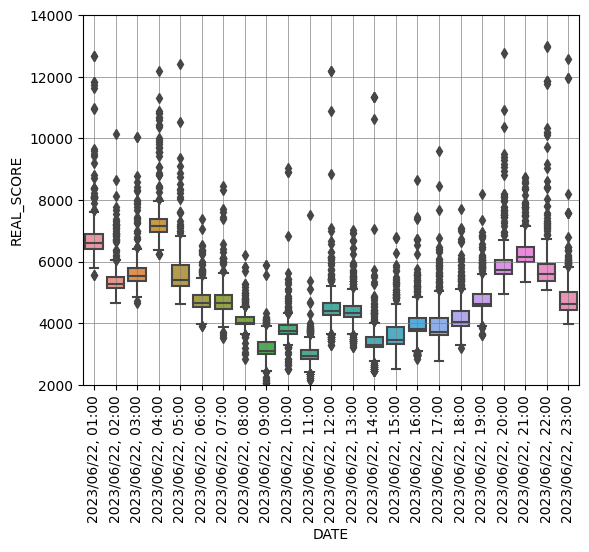

In [14]:
analyze_results_code.hour_boxplot(df_contg, "REAL_SCORE")

## Hour boxplot of predicted scores

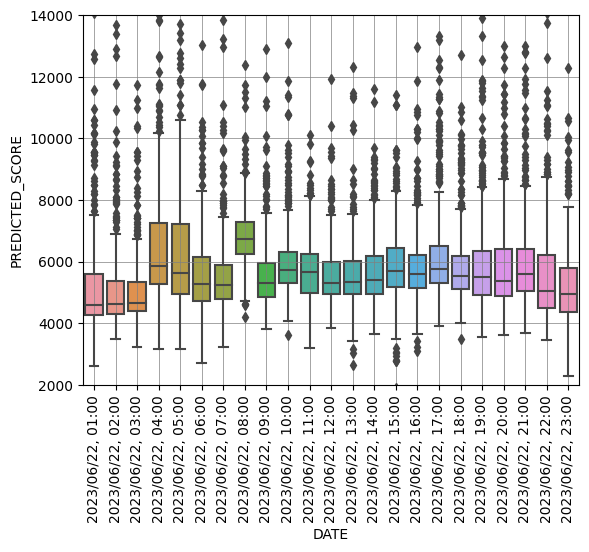

In [15]:
str_date_1 = "2023-06-22 00:00:00"
str_date_2 = "2023-06-22 23:59:59"
df_contg = df_contg.sort_values(by="DATE", ascending=True)

mask = (df_contg["DATE"] > datetime.strptime(str_date_1, '%Y-%m-%d %H:%M:%S')) & (df_contg["DATE"] <= datetime.strptime(str_date_2, '%Y-%m-%d %H:%M:%S'))

df_filtered = df_contg.loc[mask]

df_filtered = df_filtered[df_filtered["STATUS"] == "BOTH"]

# Creating dataset
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(x=df_filtered['DATE'].dt.strftime("%Y/%m/%d, %H:%M"), y=pd.to_numeric(df_filtered["PREDICTED_SCORE"])).set(
            xlabel='DATE', 
            ylabel='PREDICTED_SCORE')

plt.xticks(rotation=90)
plt.ylim(2000, 14000)
plt.grid(color='grey', linewidth=0.5)

## Day boxplot of real scores

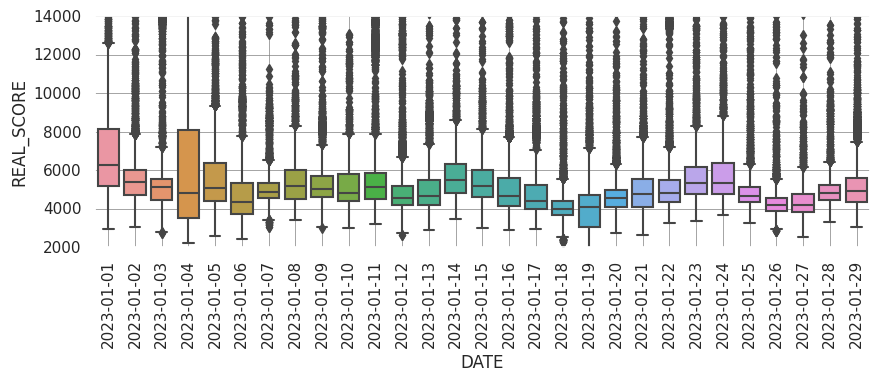

In [16]:
analyze_results_code.day_boxplot(df_contg, "REAL_SCORE")

## Day boxplot of predicted scores

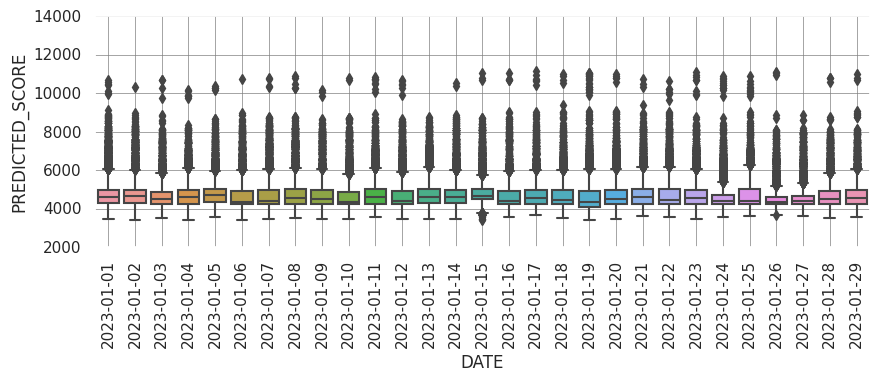

In [17]:

str_date_1 = "2023-01-01 00:00:00"
str_date_2 = "2023-01-31 23:59:59"
df_contg = df_contg.sort_values(by="DATE", ascending=True)

mask = (df_contg["DATE"] > datetime.strptime(str_date_1, '%Y-%m-%d %H:%M:%S')) & (df_contg["DATE"] <= datetime.strptime(str_date_2, '%Y-%m-%d %H:%M:%S'))

df_filtered = df_contg.loc[mask]

df_filtered = df_filtered[df_filtered["STATUS"] == "BOTH"]

df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'], format='%Y-%m-%d %H:%M:%S').dt.date

# Creating dataset
sns.set(rc={"figure.figsize":(10, 3)})
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(x=df_filtered["DATE"], y=pd.to_numeric(df_filtered["PREDICTED_SCORE"])).set(
            xlabel='DATE', 
            ylabel='PREDICTED_SCORE')
plt.xticks(rotation=90)
plt.ylim(2000, 14000)
plt.grid(color='grey', linewidth=0.5)

## Real score histogram

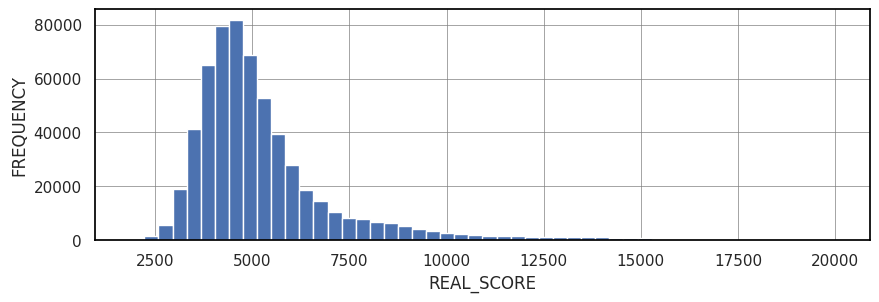

In [18]:
analyze_results_code.score_histogram(df_contg, "REAL_SCORE")

## Predicted score histogram

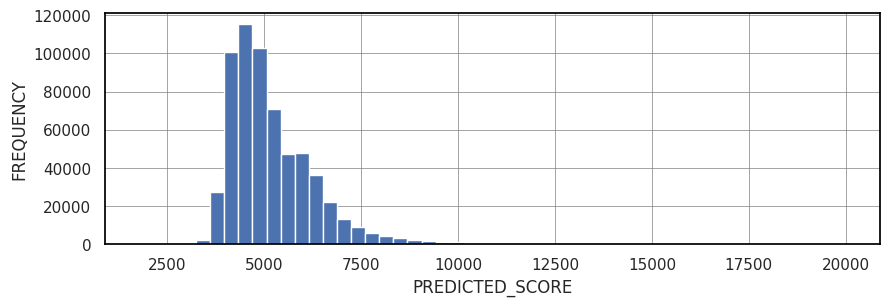

In [19]:
analyze_results_code.score_histogram(df_contg, "PREDICTED_SCORE")

## Shap values

In [20]:
# Get shap values
np.bool = bool
explainer = shap.TreeExplainer(pickle.load(open("Models/GBR_model.pkl", "rb")), link="logit")

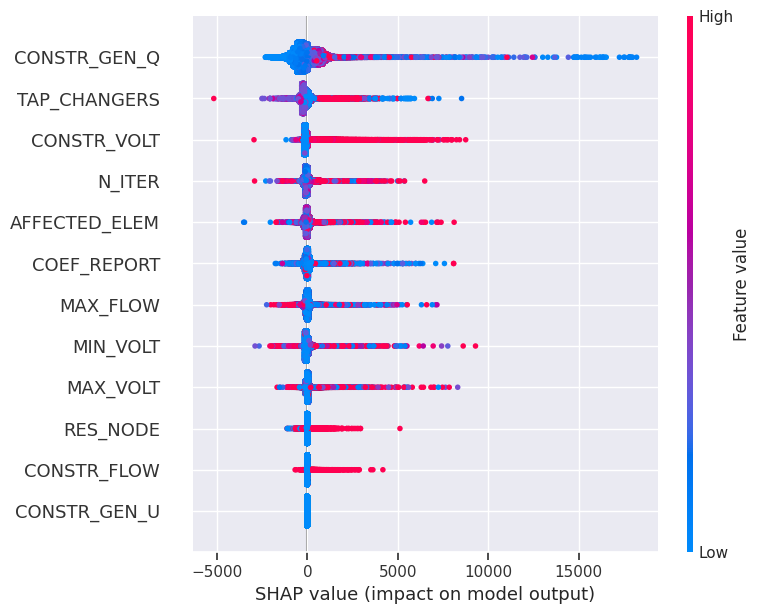

In [21]:
_, X_test = train_test_split(df_contg.drop(columns=['PREDICTED_SCORE', 'STATUS', 'REAL_SCORE', 'DATE']), test_size=0.2, random_state=42)

shap_values = explainer.shap_values(X_test)

plt.clf()
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

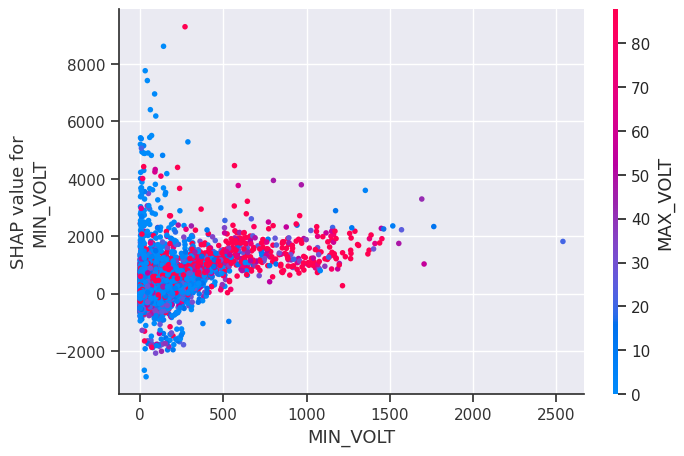

In [22]:
shap.dependence_plot(
    "MIN_VOLT",
    shap_values,
    X_test,
)

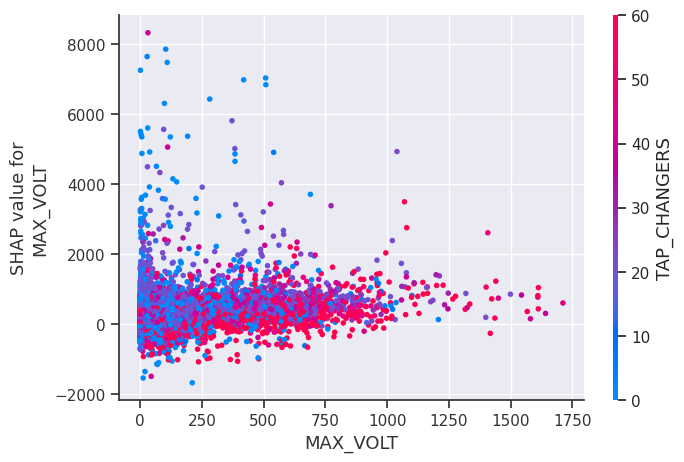

In [23]:
shap.dependence_plot(
    "MAX_VOLT",
    shap_values,
    X_test,
)

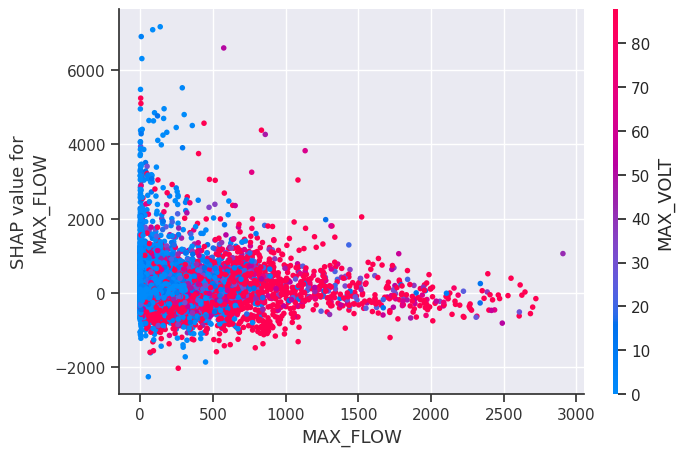

In [24]:
shap.dependence_plot(
    "MAX_FLOW",
    shap_values,
    X_test,
)

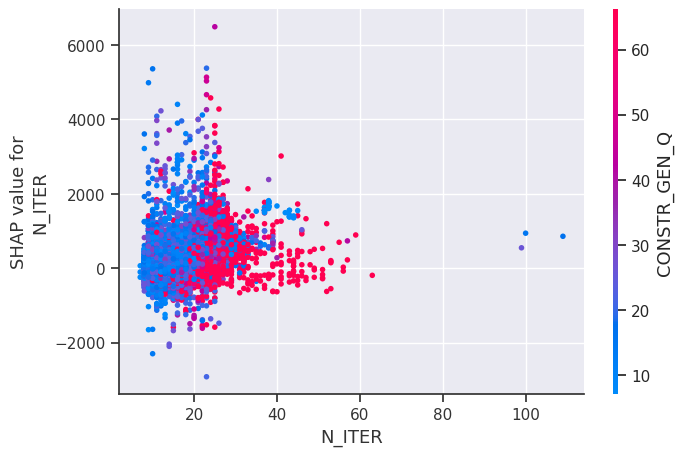

In [25]:
shap.dependence_plot(
    "N_ITER",
    shap_values,
    X_test,
)

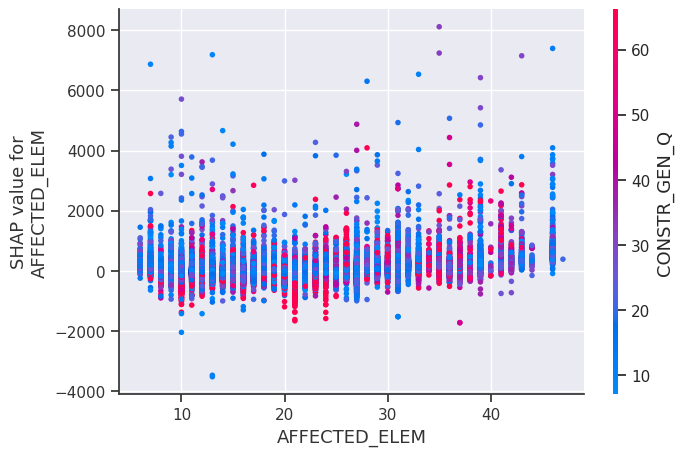

In [26]:
shap.dependence_plot(
    "AFFECTED_ELEM",
    shap_values,
    X_test,
)

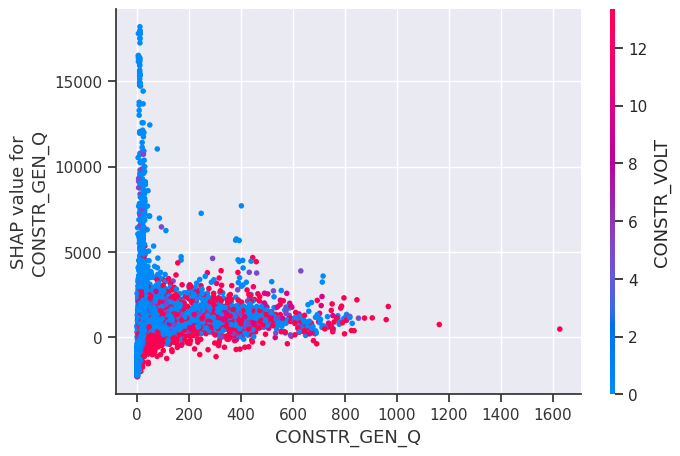

In [27]:
shap.dependence_plot(
    "CONSTR_GEN_Q",
    shap_values,
    X_test,
)

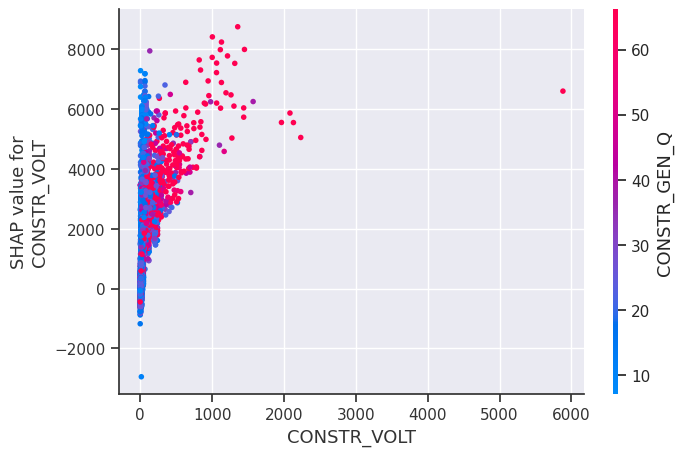

In [28]:
shap.dependence_plot(
    "CONSTR_VOLT",
    shap_values,
    X_test,
)

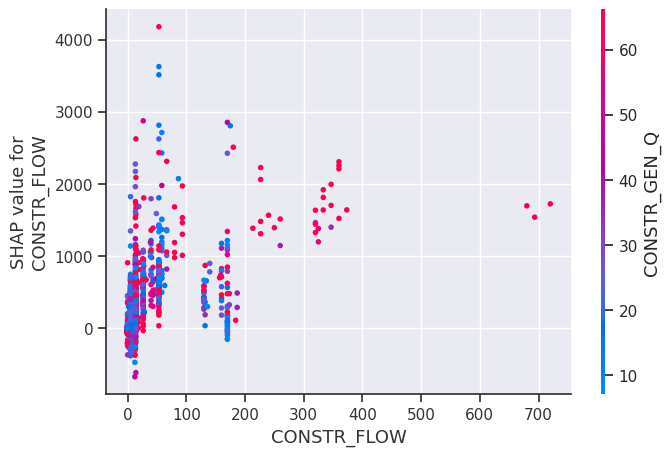

In [29]:
shap.dependence_plot(
    "CONSTR_FLOW",
    shap_values,
    X_test,
)

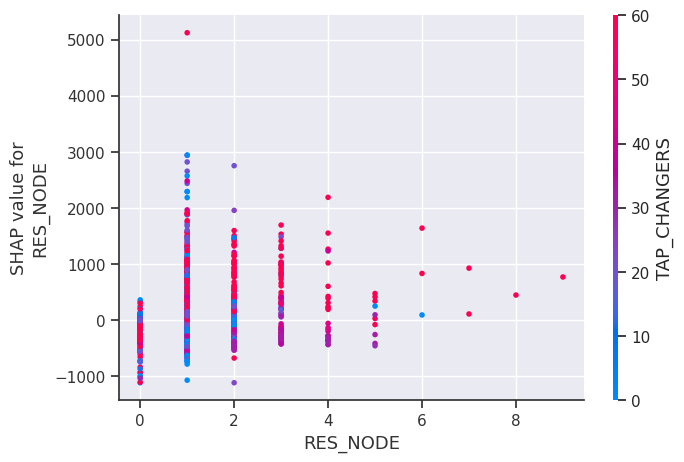

In [30]:
shap.dependence_plot(
    "RES_NODE",
    shap_values,
    X_test,
)

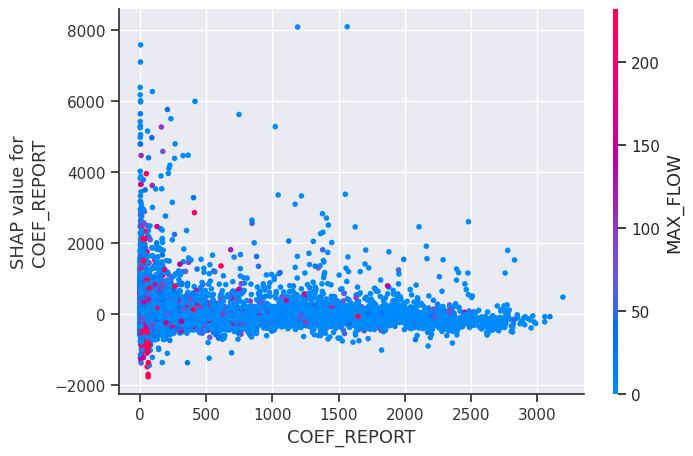

In [31]:
shap.dependence_plot(
    "COEF_REPORT",
    shap_values,
    X_test,
)

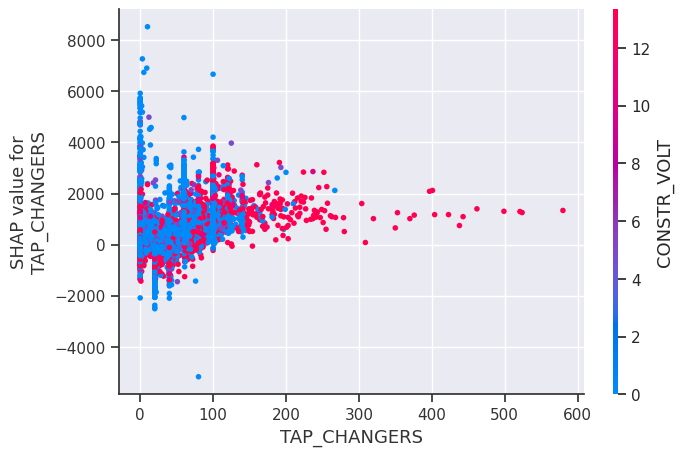

In [32]:
shap.dependence_plot(
    "TAP_CHANGERS",
    shap_values,
    X_test,
)